## ID:A1818
## Submission Date: 3-3-19

# Entrance Challenge: When Will the Sakura Bloom?

# 0. Basics of the Sakura Bloom-cycle (5pts total)

In a year, sakura trees basically go through 4 phases: energy production, hibernation, growth, and of course flowering. These phases
roughly follow the seasons, but not exactly. <br>

   Production phase： Initial development of the buds（Summer-Fall） <br>
   Hibernation phase： Bud growth stops while the tree goes into hibernation（Late Fall-Winter） <br>
   Growth phase： Buds once again continue to grow when the tree comes out of its winter hibernation（Late Winter-Spring） <br>
   Flowering phase： The buds finally bloom in spring (as climate conditions allow), once they have been able to fully develop.（Spring） <br>
    
Each year, near the end of winter but before the trees finally bloom, the hibernation period ends. The sakura that rested through the winter once gain become metabolically active, and the buds continue to grow (though we may not immediately notice when this happens.) However, the cycle is not simply clockwork- for example, in places where the temperature is above 20℃ year-round, the trees are unable to hibernate sufficiently, and thus cannot blossom.
    
In this challenge, we have outlined the basic mechanism by which the sakura reach their eventual bloom-date. We consider building a bloom-date prediction model for the case of sakura in Tokyo, with the data split as follows: <br>
    
Test years： 1966, 1971, 1985, 1994, and 2008 <br>
Training years: 1961 to 2017 (Excluding the test years) <br>
    
You should fit the model to the data from the training years, then use the model to predict the bloom-date for each of the test years. The 3 models to be applied to the data are described below.
    


### Problem 0-1: (5pts)
Acquire data of sakura blooming date (桜の開花日) for Tokyo from 1961 to 2018 using the Japanese Meteorological Agency website (気象庁).

<p><u>Data Acquisition</u>-<br>
  The Dates of sakura-blooming were collected from the Japanese Meteorological Agency website. The following links shown below are the source of Sakura bloom-dates in our dataset.<br>From
  <li>http://www.data.jma.go.jp/sakura/data/sakura003_01.html</li>To
    <li> http://www.data.jma.go.jp/sakura/data/sakura003_06.html</li>The bloom-dates were storred in a CSV file named BloomDate.CSV. The weather-data of Tokyo for the last 51 years were stored Tokyo_en.CSV.  Then both datasets were combined in one CSV file named sakura.CSV that contains the complete information on weather and bloom-dates.

In [0]:
#join google-drive to the code
from google.colab import drive #to connect google drive to the code
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import some necessary librairies
# This first set of packages include Pandas, for data manipulation, 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#numpy for mathematical computation 
import numpy as np # linear algebra

In [0]:
#and matplotlib & seaborn, for visualisation.
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!


In [0]:
# Statistical packages used for transformations
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p 
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

Statistical packages imported!


In [0]:
# Algorithms used for modeling
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
print('Algorithm packages imported!')

Algorithm packages imported!


In [0]:
# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

Pipeline and preprocessing packages imported!


In [0]:
# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Model selection packages imported!


In [0]:
# To ignore annoying warning
import warnings

import warnings
warnings.filterwarnings('ignore')


#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) 

In [0]:
#check the files available in the directory
from subprocess import check_output
print(check_output(['ls', '/content/drive/My Drive/Hiperdyne/Sakura']).decode('utf8'))

#Now let's import and put the train and test datasets in  pandas dataframe
sakuradb = pd.read_csv('/content/drive/My Drive/Hiperdyne/Sakura/sakura.csv')
print('Dataset Imported!')

Sakura_Assignmen_Final.ipynb
Sakura_Assignment1.ipynb
Sakura_Assignment2.ipynb
Sakura_Assignment_Meta3.ipynb
sakura_blooming-date.csv
sakura.csv
sakuratry.ipynb

Dataset Imported!


In [0]:
#display the first five rows of the train dataset if necessary
pd.set_option('display.max_columns', None)
print('5 rows of Train dataset:')
print('Shape of the sakura dataset =',str(sakuradb.shape))
sakuradb.head()

5 rows of Train dataset:
Shape of the sakura dataset = (20561, 16)


,serial,year,month,day,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom
0,0,1961,1,1,1011.7000,1012.4000,0.0000,0.0000,0.0000,2.1000,7.9000,-3.9000,41.0000,15.0000,8.6000,0.0000
1,1,1961,1,2,1020.2000,1021.0000,0.0000,0.0000,0.0000,1.5000,9.2000,-3.3000,51.0000,26.0000,8.7000,0.0000
2,2,1961,1,3,1021.3000,1022.1000,0.1000,0.8000,0.0000,2.5000,7.3000,-2.4000,58.0000,37.0000,5.4000,0.0000
3,3,1961,1,4,1004.6000,1005.3000,20.2000,13.9000,3.2000,4.7000,11.5000,0.6000,60.0000,38.0000,1.0000,0.0000
4,4,1961,1,5,1016.3000,1017.0000,0.0000,0.0000,0.0000,3.8000,7.7000,1.4000,33.0000,19.0000,8.3000,0.0000


<p>Lets split train and test data and reset the index column for both datasets</p>

In [0]:
#Split train and test 
traindb = sakuradb[(sakuradb.year != 1966)& (sakuradb.year != 1971)& (sakuradb.year != 1985)& (sakuradb.year != 1994)& (sakuradb.year != 2008)]
traindb = traindb.reset_index(drop=True)
testdb = sakuradb[(sakuradb.year == 1966)| (sakuradb.year == 1971)| (sakuradb.year == 1985)| (sakuradb.year == 1994)| (sakuradb.year == 2008)]
testdb = testdb.reset_index(drop=True)
print('Total size of Train and test Dataset =',str(testdb.shape[0]+traindb.shape[0]))

Total size of Train and test Dataset = 20561


<p>So Train and Test dataset are now properly splitted. And the combined size of train and test-db is equal to the actual dataset-sakuradb. </p>

***
## 1. Prediction using the "600 Degree Rule" (15pts total)

For a rough approximaton of the bloom-date, we start with a simple "rule-based" prediction model, called the "600 Degree Rule". The rule consists of logging the maximum temperature of each day, starting  on February 1st, and sum these temperatures until the sum surpasses 600$^\circ$C. The day that this happens is the predicted bloom-date. This 600$^\circ$C threshold is used to easily predict bloom-date in various locations varies by location. However, for more precise predictions, it should be set differently for every location. In this challenge, we verify the accuracy of the "600 Degree Rule" in the case of Tokyo.

### Problem 1-1: (5pts)
From here-on, we refer to the bloom-date in a given year $j$ as $BD_{j}$. For each year in the training data, calculate the accumulated daily maximum temperature from February 1st to the actual bloom-date $BD_{j}$, and plot this accumulated value over the training period. Then, average this accumulated value as $T_{mean}$, and verify whether we should use 600$^\circ$C as a rule for Tokyo.

<h3><p><u>Lets calculate total temperature from February 1st to the actual bloom-date  for each year and then get the Tmean for Tokyo</u></p><h3>

In [0]:
#Lets get a list for train and test years
trainyears = traindb['year'].unique().tolist()
testyears = testdb['year'].unique().tolist()
total_temps = []

#check if there is only one bloom-date for each year
if(traindb[(traindb.bloom == 1)].shape[0] == len(trainyears)): print('So each year has one bloom-date.')
  
#calculate total temperature from February 1st to the actual bloom-date  for each year
for year in trainyears:
    beginPeriod = traindb[(traindb.year == year) & (traindb.month == 2) & (traindb.day == 1)].index[0]
    endPeriod = traindb[(traindb.year == year) & (traindb.bloom == 1)].index[0]
    duration = traindb[beginPeriod:endPeriod+1]
    total_max_temp = duration['max temp'].sum()
    total_temps.append(total_max_temp)

t_mean = np.average(total_temps)
print('The average of accumulated temperature for each year','\n', 'or Tmean for Tokyo is ',t_mean, 'Degree C')

So each year has one bloom-date.
The average of accumulated temperature for each year 
 or Tmean for Tokyo is  638.3557692307693 Degree C


<p>So 600 degree rule cannot be used for Tokyo as  Tmean for Tokyo is higher than 600 degree by 38 degree centigrade. Therefore Tmean = 638 degree has to be used to predict the bloom-date in Tokyo</p>

<h3><p><u>Plotting Accumulated Max Temperature against Training Years</u></p>

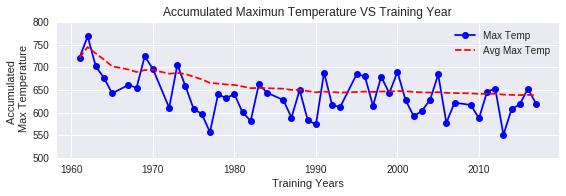

In [0]:
adding = 0
all_avg = []
for count in range(len(total_temps)):
  adding = adding + total_temps[count]
  avg = adding/(count+1)
  all_avg.append(avg)

plt.subplots(figsize=(9, 2.5))
plt.plot(trainyears,total_temps,'-bo',label='Max Temp')
plt.plot(trainyears,all_avg,'--r',label='Avg Max Temp')
plt.xlabel('Training Years')
plt.ylabel('Accumulated \n Max Temperature')
plt.ylim(500, 800)
plt.title('Accumulated Maximun Temperature VS Training Year', fontsize = 12)
plt.legend()
plt.show()

<p>So we can see that the accumulated Maximum Temperatures for most of the years are in between 600 and 700 degree centigrade. Here the dashed-line is representing average up-to a each year. From the line it can be easily understood that the accumulated Maximum Temperatures has gradually decreased over-time. The decreasing is clearly visible in the recent years</p>

### Problem 1-2: (10pts)

Use the average accumulated value $T_{mean}$ calculated in 1-1 to predict $BD_{j}$ for each test year, and show the error from the actual $BD_{j}$. Compare to the prediction results when 600$^\circ$C is used a threshold value, and evaluate both models using the coefficient of determination ($R^2$ score).

<h3><p><u>Declaring variables</u></p>

In [0]:
from datetime import date
from sklearn.metrics import r2_score

t600 = 600
bloom_dates_by_tmean = []
bloom_days_by_tmean = []

bloom_dates_by_t600 = []
bloom_days_by_t600 = []

actual_bloom_dates = []
actual_bloom_days = []

<h3><p><u>Prediction bloom-dates of test-years using Tmean</u></p>

In [0]:
for year in testyears:
  beginPeriod = testdb[(testdb.year == year) & (testdb.month == 2) & (testdb.day == 1)].index[0]
  begin_date = date(year, int(testdb[beginPeriod:beginPeriod+1]['month']), int(testdb[beginPeriod:beginPeriod+1]['day']))
  threshold_temp = 0
  while(threshold_temp < t_mean):
    threshold_temp = threshold_temp + float(testdb[beginPeriod:beginPeriod+1]['max temp'])
    beginPeriod = beginPeriod+1 
  endPeriod = beginPeriod
  bloom_date = date(year, int(testdb[endPeriod:endPeriod+1]['month']), int(testdb[endPeriod:endPeriod+1]['day']))
  bloom_duration = bloom_date - begin_date
  bloom_dates_by_tmean.append(bloom_date)
  bloom_days_by_tmean.append(bloom_duration.days-1)

<h3><p><u>Prediction bloom-dates of test-years using 600 degree rule</u></p>

In [0]:
for year in testyears:
  beginPeriod = testdb[(testdb.year == year) & (testdb.month == 2) & (testdb.day == 1)].index[0]
  begin_date = date(year, int(testdb[beginPeriod:beginPeriod+1]['month']), int(testdb[beginPeriod:beginPeriod+1]['day']))
  threshold_temp = 0
  while(threshold_temp < t600):
    threshold_temp = threshold_temp + float(testdb[beginPeriod:beginPeriod+1]['max temp'])
    beginPeriod = beginPeriod+1 
  endPeriod = beginPeriod
  bloom_date = date(year, int(testdb[endPeriod:endPeriod+1]['month']), int(testdb[endPeriod:endPeriod+1]['day']))
  bloom_duration = bloom_date - begin_date
  bloom_dates_by_t600.append(bloom_date)
  bloom_days_by_t600.append(bloom_duration.days-1)

<h3><p><u>Making a list of actual bloom-dates</u></p>

In [0]:
for year in testyears: 
  beginPeriod = testdb[(testdb.year == year) & (testdb.month == 2) & (testdb.day == 1)].index[0]
  begin_date = date(year, int(testdb[beginPeriod:beginPeriod+1]['month']), int(testdb[beginPeriod:beginPeriod+1]['day']))
  endPeriod = testdb[(testdb.year == year) & (testdb.bloom == 1)].index[0]
  bloom_date = date(year, int(testdb[endPeriod:endPeriod+1]['month']), int(testdb[endPeriod:endPeriod+1]['day']))
  bloom_duration = (bloom_date - begin_date)
  actual_bloom_days.append(bloom_duration.days)
  actual_bloom_dates.append(bloom_date)

<h3><p><u>Comparison of prediction for Tmean and 600-Degree rule with respect to actual bloom-dates</u></p>

In [0]:
print('Comparison of prediction for Tmean and 600-Degree rule','\n','with respect to actual bloom-dates')  
percentile_list = pd.DataFrame({'Actual-bloom-dates' : actual_bloom_dates,
                                'Bloom_dates_by_Tmean' : bloom_dates_by_tmean,
                                'Bloom_dates_by_T600' : bloom_dates_by_t600 })
percentile_list

Comparison of prediction for Tmean and 600-Degree rule 
 with respect to actual bloom-dates


,Actual-bloom-dates,Bloom_dates_by_T600,Bloom_dates_by_Tmean
0,1966-03-20,1966-03-21,1966-03-24
1,1971-03-30,1971-03-28,1971-03-30
2,1985-04-03,1985-03-30,1985-04-02
3,1994-03-31,1994-03-29,1994-04-01
4,2008-03-22,2008-03-24,2008-03-26


<h3><p><u>Error comparison of T600 and Tmean using Scatterplot</u></p>

In [0]:
ABD = actual_bloom_dates.copy()
BDTmean = bloom_dates_by_tmean.copy()
BDT600 = bloom_dates_by_t600.copy()
#Errors for T600 & Tmean
errorTmean = []
errorT600 = []
for count in range(len(ABD)):
  errorTmean.append(abs(ABD[count] - BDTmean[count]).days)
  errorT600.append(abs(ABD[count] - BDT600[count]).days)

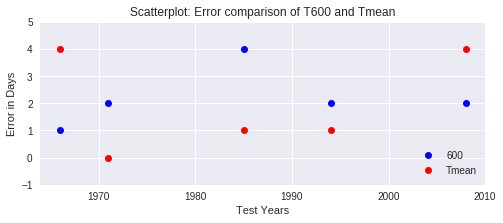

In [0]:
plt.subplots(figsize=(8, 3))
plt.plot(testyears,errorT600,'bo',label='600')
plt.plot(testyears,errorTmean,'ro',label='Tmean')
plt.xlabel('Test Years')
plt.ylabel('Error in Days')
plt.title('Scatterplot: Error comparison of T600 and Tmean')
plt.ylim(-1,5)
plt.legend()
plt.show() 

<h3><p><u>Error comparison of T600 and Tmean using Barplot</u></p>

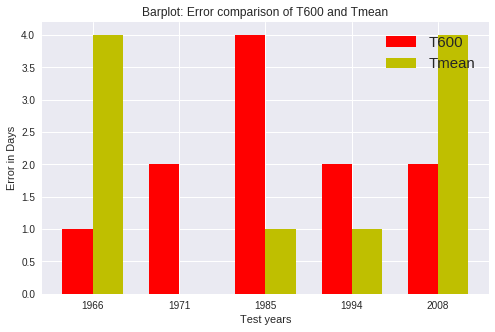

In [0]:
ind = np.arange(len(testyears))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
p1 = ax.bar(ind, errorT600, width, color='r')
p2 = ax.bar(ind + width, errorTmean, width,color='y')
ax.set_title('Barplot: Error comparison of T600 and Tmean')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(testyears)
ax.legend((p1[0], p2[0]), ('T600', 'Tmean'),loc='best', fontsize=15)
plt.ylabel('Error in Days')
plt.xlabel('Test years')
plt.show()

<h3>Plot-discussion</h3>
<p><u></u><br>From both scatter-plot and bar-plot we can see that the error of 600-degree-rule is considerably higher than Tmean Rule for the majority of years. On the other hand Tmean-rule shows less error though it showed higher error than 600-degree-rule for the years 1966 and 2008. So it is not always better. Therefore we can calculate the average of the predictions from both models to achieve more generalized results.</p>

<h3><p><u>Calculating R2-score for Tmean and 600 degree rule</u></p>

In [0]:
actual_bloom_days_600degree = actual_bloom_days
predicted_bloom_days_by_t600 = bloom_days_by_t600
predicted_bloom_days_by_tmean = bloom_days_by_tmean
print('R2-Score for T600: ',r2_score(actual_bloom_days, bloom_days_by_t600))
print('R2-Score for Tmean: ',r2_score(actual_bloom_days, bloom_days_by_tmean))

R2-Score for T600:  0.6793002915451896
R2-Score for Tmean:  0.8323615160349854


<p>So Tmean Rule shows higher R2 score for the testdb </p>

***
## 2. Linear Regression Model: Transform to Standard Temperature (30pts total)

The year to year fluctuation of the bloom-date depends heavily upon the actual temperature fluctuation (not just the accumulated maximum). In order to get to a more physiologically realistic metric,  Sugihara et al. (1986) considered the actual effect of temperature on biochemical activity. They introduced a method of "standardizing" the temperatures measured, according to the fluctuation relative to a standard temperature.

In order to make such a standardization, we apply two major assumptions, outlined below.

#### 1) The Arrhenius equation: <br>

The first assumption, also known in thermodynamics as the "Arrhenius equation", deals with chemical reaction rates and can be written as follows:

$$
k = A \exp{ \Bigl(- \frac{E_{a}}{RT}} \Bigr)
$$ <br>

Basically, it says that each reaction has an activation energy, $E_{a}$ and a pre-exponential factor $A$. Knowing these values for the particular equation, we can find the rate constant $k$ if we know the temperature, $T$, and applying the universal gas constant, $R = 8.314 \rm [J/K・mol]$.

#### 2) Constant output at constant temperature: <br>

The second assumption, is simply that the output of a reaction is a simple product of the duration and the rate constant $k$, and that product is constant even at different temperatures.
    
$$
tk = t'k' = t''k'' = \cdots = \rm{const}
$$ <br>


Making the assumptions above, we can determine a "standard reaction time", $t_{s}$ required for the bloom-date to occur. We can do so in the following way:

<br>
$$
t_{s} = \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>

We define $T_{i, j}$ as the daily average temperature, and use a standard temperature of $T_{s} = 17^\circ\rm{C}$. For a given year $j$, with the last day of the hibernation phase set as $D_ {j}$, we define the number of "transformed temperature days",  $DTS_{ J}$,  needed to reach from $D_ {j}$ to the bloom-date $BD_{j}$ with the following equation:


<br>
$$
DTS_{j} = \sum_{i=D_{j}}^{BD_{j}} t_{s} = \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>



From that equation, we can find the average $DTS$ for $x$ number of years ($DTS_{ mean}$) as follows: 

<br>
$$
\begin{align}
DTS_{\rm{mean}} &= \frac{1}{x} \sum_{j}^{x} DTS_{j} \\
&= \frac{1}{x} \sum_{j}^{x} \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
\end{align}
$$ <br> <br>

In this exercise, we assume that $DTS_{ mean}$ and $E_{ a}$ are constant values, and we use the data from the training years to fit these 2 constants. The exercise consists of 4 steps:
1. Calculate the last day of the hibernation phase $D_ {j}$ for every year $j$.
2. For every year $j$, calculate $DTS_{ j}$ as a function of $E_{ a}$, then calculate the average (over training years) $DTS_{ mean}$ also as a function of $E_{ a}$.
3. For every year $j$, and for every value of $E_{ a}$, accumulate $t_{s}$ from $D_ {j}$ and predict the bloom date $BD_{j}^{\rm{pred}}$ as the day the accumulated value surpasses $DTS_{ mean}$. Calculate the bloom date prediction error as a function of $E_{ a}$, and find the optimal $E_{ a}$ value that minimizes that error.
4. Use the previously calculated values of $D_ {j}$, $DTS_{ mean}$, and $E_{ a}$ to predict bloom-day on years from the test set.


### Problem 2-1: (5pts)
According to Hayashi et al. (2012), the day on which the sakura will awaken from their hibernation phase, $D_{j}$, for a given location, can be approximated by the following equation:
<br> <br>
$$
D_{j} = 136.75 - 7.689 \phi + 0.133 \phi^{2} -1.307\ln L + 0.144T_{F} + 0.285T_{F}^2
$$ <br>

where $\phi$ is the latitude [°N], $L$ is the distance from the nearest coastline [km], and $T_{F}$ is that location's average temperature [°C] over the first 3 months of a given year. In the case of Tokyo, $\phi = 35°40'$ and $L=4\rm{km}$.

Find the $D_{j}$ value for every year $j$ from 1961 to 2017 (including the test years), and plot this value on a graph. 

(In Problem 1, we had assumed a $D_j$ of February 1st.)

<h3><p><u>Plotting Dj values for every year $j$ from 1961 to 2017</u></p>

In [0]:
import math
#trainyears =trainyears[ 0 : -1]
allyears = sakuradb['year'].unique().tolist()
dj_all = []
dj_all_by_day = []
dj_train = []
dj_test = []

#converting ϕ into decimal
theta = 35+(40/60)
coast_dist = 4.00

In [0]:
for year in allyears:
    beginPeriod = sakuradb[(sakuradb.year == year) & (sakuradb.month == 1) & (sakuradb.day == 1)].index[0]
    endPeriod = sakuradb[(sakuradb.year == year) & (sakuradb.month == 3) & (sakuradb.day == 31)].index[0]
    duration = sakuradb[beginPeriod:endPeriod+1]
    tf = duration['avg temp'].mean()
    dj = 136.75 - (7.689*theta) + (0.133* math.pow(theta, 2))- (1.307*np.log(coast_dist))+ (0.144*tf) + (0.285* math.pow(tf, 2))
    dj_all.append((round(dj)%31))
    dj_all_by_day.append(round(dj))

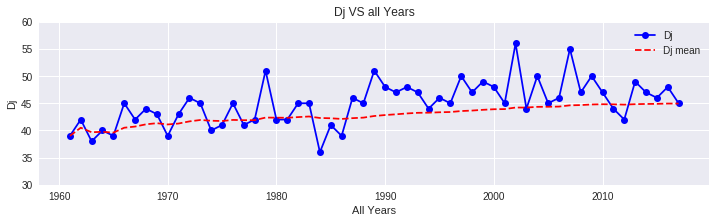

In [0]:
adding = 0
all_avg = []
for count in range(len(dj_all_by_day)):
  adding = adding + dj_all_by_day[count]
  avg = adding/(count+1)
  all_avg.append(avg)

plt.subplots(figsize=(12, 3))
plt.plot(allyears,dj_all_by_day,'-bo', label = 'Dj')
plt.plot(allyears,all_avg,'--r', label = 'Dj mean')
plt.xlabel('All Years')
plt.ylabel('Dj')
plt.ylim(30, 60)
plt.title('Dj VS all Years')
plt.legend()
plt.show()

<h3>Plot-discussion</h3>
<p><u></u><br>Here it can easily be understood that the values of Djs are higher than 30 but lower than 60 . Which means each Dj is actually any  day of the month- February. From the dashed-line of Dj-mean it is also visible that the average-Dj has increased over-time. So the last day of hybernation is gradually delaying over the years.</p>

<h3><p><u>Storing Dj values separately for Train and Test Years</u></p>

In [0]:
for year in trainyears:
    beginPeriod = traindb[(traindb.year == year) & (traindb.month == 1) & (traindb.day == 1)].index[0]
    endPeriod = traindb[(traindb.year == year) & (traindb.month == 3) & (traindb.day == 31)].index[0]
    duration = traindb[beginPeriod:endPeriod+1]
    tf = duration['avg temp'].mean()
    dj = 136.75 - (7.689*theta) + (0.133* math.pow(theta, 2))- (1.307*np.log(coast_dist))+ (0.144*tf) + (0.285* math.pow(tf, 2))
    dj_train.append((round(dj)%31))

In [0]:
for year in testyears:
    beginPeriod = testdb[(testdb.year == year) & (testdb.month == 1) & (testdb.day == 1)].index[0]
    endPeriod = testdb[(testdb.year == year) & (testdb.month == 3) & (testdb.day == 31)].index[0]
    duration = testdb[beginPeriod:endPeriod+1]
    tf = duration['avg temp'].mean()
    dj = 136.75 - (7.689*theta) + (0.133* math.pow(theta, 2))- (1.307*np.log(coast_dist))+ (0.144*tf) + (0.285* math.pow(tf, 2))
    dj_test.append((round(dj)%31))    

### Problem 2-2: (10pts)
Calcluate $DTS_j$ for each year $j$ in the training set for discrete values of $E_{a}$, varying from 5 to 40kcal ($E_{a} = 5, 6, 7, \cdots, 40 \,\rm{kcal}$), and plot this $DTS_j$ against $E_{a}$. Also calculate the average of $DTS_{j}$ over the training period, and indicate it on the plot as $DTS_{mean}$. Pay attention to the units of **every parameter** ($T_{i,j}$, $E_{a}$, etc) in the equation for $t_{s}$. 


<h3><p><u>Calculating DTSmean for each Ea value</u></p>

In [0]:
const_temp = 17+273.15
dtsj_per_ea = []
dts_mean_per_ea = []
all_ea = list(range(5, 41))
for ea in all_ea:
  dtsj_per_year = []
  for count in range(len(trainyears)):
    beginPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.month == 2) & (traindb.day == dj_train[count])].index[0]
    endPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.bloom == 1)].index[0]
    duration = traindb[beginPeriod:endPeriod+1]
    #duration = traindb[beginPeriod:endPeriod]
    duration['avg temp kelvin'] = duration['avg temp']+273.15
    duration['ts'] = np.exp((ea*(duration['avg temp kelvin'] - const_temp))/(duration['avg temp kelvin']*const_temp*0.00198588))
    dtsj = duration['ts'].sum()
    dtsj_per_year.append(dtsj)
  dtsj_per_ea.append(dtsj_per_year)
  dts_mean_per_ea.append(np.average(dtsj_per_year))

<h3><p><u>Plotting DTS VS Ea for all Train years</u></p>

Average DTSmean over all Ea =  15.088145130425694


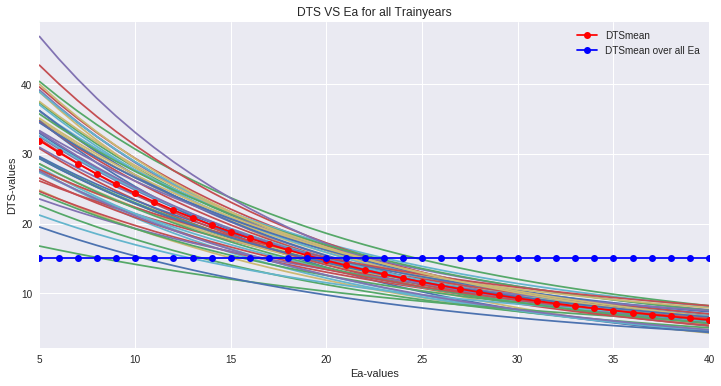

In [0]:
avg_dts_mean = sum(dts_mean_per_ea)/len(dts_mean_per_ea)
print('Average DTSmean over all Ea = ',avg_dts_mean)

avg_dts_mean = [avg_dts_mean for i in range(len(all_ea))]

plt.subplots(figsize=(12, 6))
dtsj_for_each_year = []

for i in range(len(trainyears)):
  dtsj_for_each_ea = []
  for j in range(len(all_ea)):
    dtsj_for_each_ea.append(dtsj_per_ea[j][i])
  dtsj_for_each_year.append(dtsj_for_each_ea)  

for i in range(len(trainyears)):
    plt.plot(all_ea,dtsj_for_each_year[i]) 

plt.xlabel("Ea-values")    
plt.ylabel("DTS-values")                               
plt.title("DTS VS Ea for all Trainyears")    
plt.plot(all_ea, dts_mean_per_ea,"-ro",label="DTSmean")
plt.xlim(5, 40)
plt.plot(all_ea,avg_dts_mean,"-bo",label="DTSmean over all Ea")
plt.legend()
plt.show()

<h3>Plot-Discussion</h3>
<p><u></u><br>From the above plot it is clearly visible that the red-dotted DTSmean cluve has passed through the middle of all the curves for all the years of training dataset. Now we have to figure-out the best Ea and DTSmean combination for which the squared-error on test-data becomes minimum. </p>

### Problem 2-3: (11pts)
Using the same $E_{a}$ values and calculated $DTS_{mean}$ from 2-2, predict the bloom date $BD_{j}$ for each of the training years. Find the mean squared error relative to the actual $BD$ and plot it against $E_{a}$. Find the optimal $E_{a}^{*}$ that minimizes that error on the training data.

<h3><p><u>Predicting Bloom-dates of all train-years for each Ea value</u></p>

In [0]:
bloom_dates_per_ea = []
bloom_days_per_ea = []
traindb['avg temp kelvin'] = traindb['avg temp']+273.15
for value in range(len(all_ea)):
  bloom_dates_by_DTSmean = []
  bloom_days_by_DTSmean = []
  for count in range(len(trainyears)):
    marginPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.month == 2) & (traindb.day == 1)].index[0]
    margin_date = date(trainyears[count], int(traindb[marginPeriod:marginPeriod+1]['month']), int(traindb[marginPeriod:marginPeriod+1]['day']))
    beginPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.month == 2) & (traindb.day == dj_train[count])].index[0]
    begin_date = date(trainyears[count], int(traindb[beginPeriod:beginPeriod+1]['month']), int(traindb[beginPeriod:beginPeriod+1]['day']))
    threshold_dts = 0
    while(threshold_dts <= dts_mean_per_ea[value]):
      avg_temp = float(traindb[beginPeriod:beginPeriod+1]['avg temp kelvin'])
      ts = np.exp((all_ea[value]*(avg_temp-const_temp))/(avg_temp*const_temp*0.00198588))
      threshold_dts = threshold_dts + ts
      beginPeriod = beginPeriod+1
    endPeriod = beginPeriod
    bloom_date = date(trainyears[count], int(traindb[endPeriod:endPeriod+1]['month']), int(traindb[endPeriod:endPeriod+1]['day']))
    bloom_duration = bloom_date - begin_date
    bloom_dates_by_DTSmean.append(bloom_date)
    bloom_days_by_DTSmean.append(bloom_duration.days)
  bloom_dates_per_ea.append(bloom_dates_by_DTSmean)
  bloom_days_per_ea.append(bloom_days_by_DTSmean)

<h3><p><u>Storring actual bloom-dates for each train-year</u></p>

In [0]:
actual_bloom_days = []
actual_bloom_dates = []
for count in range(len(trainyears)):
  marginPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.month == 2) & (traindb.day == 1)].index[0]
  margin_date = date(trainyears[count], int(traindb[marginPeriod:marginPeriod+1]['month']), int(traindb[marginPeriod:marginPeriod+1]['day']))
  beginPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.month == 2) & (traindb.day == dj_train[count])].index[0]
  begin_date = date(year, int(traindb[beginPeriod:beginPeriod+1]['month']), int(traindb[beginPeriod:beginPeriod+1]['day']))
  endPeriod = traindb[(traindb.year == trainyears[count]) & (traindb.bloom == 1)].index[0]
  bloom_date = date(year, int(traindb[endPeriod:endPeriod+1]['month']), int(traindb[endPeriod:endPeriod+1]['day']))
  bloom_duration = bloom_date - begin_date
  actual_bloom_days.append(bloom_duration.days)
  actual_bloom_dates.append(bloom_date)

<h3><p><u>Calculating optimal Ea that minimizes squared-error on trainDB</u></p>

In [0]:
mse_per_ea = []
for value in range(len(all_ea)):
  squared_errors = []
  for count in range(len(trainyears)):
    error = (bloom_days_per_ea[value][count]) - (actual_bloom_days[count])
    squared_errors.append(math.pow(error, 2))
  mse_per_ea.append(np.mean(squared_errors))  
  
min_error = np.min(mse_per_ea)
for value in range(len(all_ea)):
  if(mse_per_ea[value] == min_error): 
    best_value = value
    best_ea = all_ea[value]
    best_dtsm = dts_mean_per_ea[value]
    
print('So for the ',best_value,'th Ea the mean-squared-error is found minimum ')
print('The value of',best_value,'th Ea is: ',best_ea,'which is considered optimal')
print('The value of DTSmean for optimal Ea (= ',best_ea, ') is: ',best_dtsm)  

So for the  23 th Ea the mean-squared-error is found minimum 
The value of 23 th Ea is:  28 which is considered optimal
The value of DTSmean for optimal Ea (=  28 ) is:  10.165189335489261


<h3><p><u>Plotting mean-squared errors with respect to Ea values </u></p>

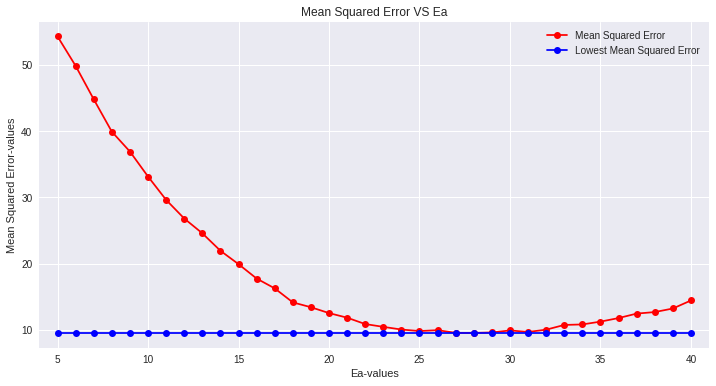

In [0]:
min_mse = [min_error for i in range(len(all_ea))]
plt.subplots(figsize=(12, 6))
plt.plot(all_ea, mse_per_ea,"-ro",label="Mean Squared Error")
plt.xlim(4, 41)
plt.plot(all_ea,min_mse,"-bo",label="Lowest Mean Squared Error")
plt.xlabel("Ea-values")    
plt.ylabel("Mean Squared Error-values")                               
plt.title("Mean Squared Error VS Ea")
plt.legend()
plt.show()

<p>As we can see that the blue straight-line representing the lowest mean squared error intersects the mean-squared-error curve at its lowest value where Ea-value is found 28. Therefore the optimal Ea calculation is proved to be correct.</p>

### Problem 2-4: (4pts)

Using the $D_j$ dates from problem 2-1, the average $DTS_{mean}$ from 2-2, and the best-fit $E_{a}^{*}$ from 2-3, predict the bloom-dates $BD_j$ for the years in the test set. Determine the error between your predicted $BD_j$ values and the actual values, and evaluate this model using the coefficient of determination ($R^2$ score).

<h3><p><u>Predicting bloom-dates of test-years using the best Ea and DTSmean</u></p>

In [0]:
predicted_bloom_dates = []
predicted_bloom_days = []
testdb['avg temp kelvin'] = testdb['avg temp']+273.15
for count in range(len(testyears)):
  beginPeriod = testdb[(testdb.year == testyears[count]) & (testdb.month == 2) & (testdb.day == dj_test[count])].index[0]
  begin_date = date(testyears[count], int(testdb[beginPeriod:beginPeriod+1]['month']), int(testdb[beginPeriod:beginPeriod+1]['day']))
  threshold_dts = 0
  while(threshold_dts < best_dtsm):
    avg_temp = float(testdb[beginPeriod:beginPeriod+1]['avg temp kelvin'])
    ts = np.exp((best_ea*(avg_temp-const_temp))/(avg_temp*const_temp*0.00198588))
    threshold_dts = threshold_dts + ts
    beginPeriod = beginPeriod+1
  endPeriod = beginPeriod
  bloom_date = date(testyears[count], int(testdb[endPeriod:endPeriod+1]['month']), int(testdb[endPeriod:endPeriod+1]['day']))
  bloom_duration = bloom_date - begin_date
  predicted_bloom_dates.append(bloom_date)
  predicted_bloom_days.append(bloom_duration.days-1)

<h3><p><u>Storring actual bloom-dates for each test-year</u></p>

In [0]:
actual_bloom_days = []
actual_bloom_dates = []
for count in range(len(testyears)):
  marginPeriod = testdb[(testdb.year == testyears[count]) & (testdb.month == 2) & (testdb.day == 1)].index[0]
  margin_date = date(testyears[count], int(testdb[marginPeriod:marginPeriod+1]['month']), int(testdb[marginPeriod:marginPeriod+1]['day']))
  beginPeriod = testdb[(testdb.year == testyears[count]) & (testdb.month == 2) & (testdb.day == dj_test[count])].index[0]
  begin_date = date(testyears[count], int(testdb[beginPeriod:beginPeriod+1]['month']), int(testdb[beginPeriod:beginPeriod+1]['day']))
  endPeriod = testdb[(testdb.year == testyears[count]) & (testdb.bloom == 1)].index[0]
  bloom_date = date(testyears[count], int(testdb[endPeriod:endPeriod+1]['month']), int(testdb[endPeriod:endPeriod+1]['day']))
  bloom_duration = bloom_date - begin_date
  actual_bloom_days.append(bloom_duration.days)
  actual_bloom_dates.append(bloom_date) 

<h3><p><u>Visualizing prediction-errors on test-db</u></p>

In [0]:
ABD = actual_bloom_dates.copy()
PRD = predicted_bloom_dates.copy()
errors = []

for count in range(len(ABD)):
  errors.append(abs(ABD[count] - PRD[count]).days)

print('Comparison of Predicted-Bloom-dates','\n','with respect to Actual bloom-dates')  
percentile_list = pd.DataFrame({'Actual-bloom-dates' : ABD,
                                'Predicted-bloom-dates' : PRD,
                                'Prediction-error' : errors})
percentile_list

Comparison of Predicted-Bloom-dates 
 with respect to Actual bloom-dates


,Actual-bloom-dates,Predicted-bloom-dates,Prediction-error
0,1966-03-20,1966-03-21,1
1,1971-03-30,1971-03-30,0
2,1985-04-03,1985-04-02,1
3,1994-03-31,1994-04-02,2
4,2008-03-22,2008-03-24,2


<h3><p><u>Plotting prediction-errors on test-db</u></p>

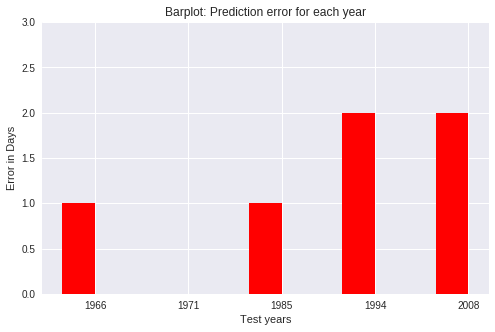

In [0]:
ind = np.arange(len(testyears))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
p1 = ax.bar(ind, errors, width, color='r')
ax.set_title('Barplot: Prediction error for each year')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(testyears)
plt.ylabel('Error in Days')
plt.xlabel('Test years')
plt.ylim(0, 3)
plt.show()

<h3>Plot-discussion</h3>
<p><u></u><br>From the above error-plot it is observed that the errors generated by the DTS method is much less than the Tmean method of problem 1. Here the maximum-error is also decreased by half compared to the Tmean method. For the first three samples the difference in between actual and predicted bloom-days was only one day maximum. </p>

<p><u>Calculating R2 score</u></p>

In [0]:
actual_bloom_days_dts = actual_bloom_days
predicted_bloom_days_by_dts = predicted_bloom_days
print('Final R2-score for the Linear-regression model: ',r2_score(actual_bloom_days, predicted_bloom_days))

Final R2-score for the Linear-regression model:  0.9712171052631579


### Problem 2-5: (extra 10pts)
Discuss any improvements you could make to the model outlined above. If you have a suggestion in particular, describe it. How much do you think the accuracy would be improved?

1.According to the mentioned model and datasets, there is an assumption that the average temperature of a single day is sustained throughout the day. This is not the case in real life as the temperature can flactuate even from hour to hour. So if the fluctuations of the temperature could be added, the accuracy and could possibly be improved.



2.There are different species of cherry trees from the Prunus genus. Different species of trees might have different type if implecations to different changes of variables. We did not take that into account. If we can take those things into consideration, accuracy might be improved.

<h3><p><u>Discussion on Improvement of the Model</u><br><br></h3>

  <ul>1. Number of years taken into consideration for both training and testing should be increased for better resolution.</ul> 
  <ul>2. More features relevant to sakura-blooming could be considered alongside the temperature.</ul> 
  <ul>3. The assumptions made to establish the model might not withstand under certain circumstances.</ul> 
       <ul>4. Both the Arrhenius activation energy Ea and the rate constant k are experimentally determined</ul>
    <ul>5. The equation of Hayashi et al.(2012) for determining the end of Hibernation is just a mere approximation. It can be modified considering discrepencies.</ul>
       <ul>6. Catalysts increase the rate of reaction. Presence of such catalysts in an area's soil can be investigated</ul>
       <ul>7. The activation energy for the reaction increases with temperature. So Ea decreases with T and therefore Ea is not completely independent of T</ul>
  <ul>8. R-squared score can sometime mislead. The score may also be too-low or too-high when the test-dataset is smaller. Proper alternative can be taken into consideration to justify model-performance.</ul> <br>
These are the suggestions in particular. I believe the prediction can be perfected further by applying several modifications in the equations and training the model with more data</p>

***
## 3. Predicting Bloom-date via Neural Network (30pts total)

### Problem 3-1: (20pts)

Build a neural network and train it on the data from the training years. Use this model to predict the bloom-dates for each year in the test set. Evaluate the error between predicted dates and actual dates using the coefficient of determination (R2 score). Only use the weather data given in `tokyo.csv` and the sakura data acquired in problem 0-1.</br>
You may use whichever framework or strategy that you like to construct the network. 

In [0]:
sakurayears = sakuradb['year'].unique().tolist()
sakurayears = sakurayears[ 0 : -1]
actual_bloom_days = []
#get actual bloom-dates
for year in sakurayears: 
  beginPeriod = sakuradb[(sakuradb.year == year) & (sakuradb.month == 1) & (sakuradb.day == 1)].index[0]
  begin_date = date(year, int(sakuradb[beginPeriod:beginPeriod+1]['month']), int(sakuradb[beginPeriod:beginPeriod+1]['day']))
  endPeriod = sakuradb[(sakuradb.year == year) & (sakuradb.bloom == 1)].index[0]
  bloom_date = date(year, int(sakuradb[endPeriod:endPeriod+1]['month']), int(sakuradb[endPeriod:endPeriod+1]['day']))
  bloom_duration = (bloom_date - begin_date)
  actual_bloom_days.append(bloom_duration.days)
  
columns = list(sakuradb)[4:-1]

all_column_mean = []
for column in columns:
  column_mean_per_year = []
  for year in sakurayears:
    beginPeriod = sakuradb[(sakuradb.year == year) & (sakuradb.month == 1) & (sakuradb.day == 1)].index[0]
    endPeriod = sakuradb[(sakuradb.year == year) & (sakuradb.month == 4) & (sakuradb.day == 30)].index[0]
    #duration = traindb[beginPeriod:endPeriod]
    duration = sakuradb[beginPeriod:endPeriod+1]
    mean = duration[column].mean()
    column_mean_per_year.append(mean)
  all_column_mean.append(column_mean_per_year)  

In [0]:
#len(dtsj_per_ea[23])
#len(sakuradb)

In [0]:
sakuradb = pd.DataFrame(all_column_mean).T
sakuradb.columns = columns
sakuradb['bloom day'] = actual_bloom_days
sakuradb['year'] = sakurayears
sakuradb.head(9)

,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom day,year
0,1014.5358,1015.2492,3.1017,0.9992,0.3058,7.8333,13.1867,3.3633,56.7917,35.6917,6.4033,90,1961
1,1012.7275,1013.4400,2.0308,0.6017,0.2000,8.2167,13.6117,3.3400,55.0167,33.8167,6.6508,90,1962
2,1012.3967,1013.1100,1.5358,0.4075,0.1175,7.3908,12.8475,2.6150,55.4750,33.6583,6.8617,90,1963
3,1017.6661,1018.3777,3.3264,0.8893,0.2223,8.1273,12.5529,4.1091,62.0248,43.5868,4.9835,92,1964
4,1009.8208,1014.2183,1.5833,0.5333,0.2208,6.7992,11.2733,2.6267,53.0250,34.9917,6.6633,91,1965
5,1009.5825,1013.9542,3.1600,1.0558,0.3342,8.7483,13.0767,4.4858,55.6833,38.0667,5.2367,78,1966
6,1012.8858,1017.2792,2.0867,0.6800,0.1833,8.3700,12.6458,4.0408,53.7750,37.4417,5.9150,88,1967
7,1010.8570,1015.2388,2.2231,0.7066,0.2686,8.5711,13.0562,4.2050,51.5620,33.9421,6.4050,88,1968
8,1011.0767,1015.4667,2.9042,0.7792,0.2792,8.4783,12.6425,4.2750,58.8083,40.1083,5.0275,95,1969


In [0]:
sakuradb.shape

(56, 13)

In [0]:
len(dtsj_per_ea[23])

52

In [0]:
#Split train and test 
traindb = sakuradb[(sakuradb.year != 1966)& (sakuradb.year != 1971)& (sakuradb.year != 1985)& 
                   (sakuradb.year != 1994)& (sakuradb.year != 2008)]
#traindb['DTSj'] = dtsj_per_ea[23]
traindb = traindb.reset_index(drop=True)
testdb = sakuradb[(sakuradb.year == 1966)| (sakuradb.year == 1971)| (sakuradb.year == 1985)| 
                  (sakuradb.year == 1994)| (sakuradb.year == 2008)]
testdb = testdb.reset_index(drop=True)
testdb.shape[0]+traindb.shape[0]

56

In [0]:
traindb.head()

,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom day,year
0,1014.5358,1015.2492,3.1017,0.9992,0.3058,7.8333,13.1867,3.3633,56.7917,35.6917,6.4033,90,1961
1,1012.7275,1013.4400,2.0308,0.6017,0.2000,8.2167,13.6117,3.3400,55.0167,33.8167,6.6508,90,1962
2,1012.3967,1013.1100,1.5358,0.4075,0.1175,7.3908,12.8475,2.6150,55.4750,33.6583,6.8617,90,1963
3,1017.6661,1018.3777,3.3264,0.8893,0.2223,8.1273,12.5529,4.1091,62.0248,43.5868,4.9835,92,1964
4,1009.8208,1014.2183,1.5833,0.5333,0.2208,6.7992,11.2733,2.6267,53.0250,34.9917,6.6633,91,1965


In [0]:
testdb

,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom day,year
0,1009.5825,1013.9542,3.1600,1.0558,0.3342,8.7483,13.0767,4.4858,55.6833,38.0667,5.2367,78,1966
1,1010.9492,1015.3467,2.2625,0.6750,0.2250,8.2192,12.4325,4.2917,54.9500,36.7250,5.8192,88,1971
2,1012.2500,1016.6433,4.0208,1.0833,0.4042,8.1217,11.9217,4.6758,61.7750,43.2667,5.0992,92,1985
3,1010.1483,1014.5233,2.5167,0.8042,0.2458,8.9967,12.7792,5.3492,52.8333,34.4750,6.2283,89,1994
4,1011.2512,1015.7050,3.5868,1.0248,0.3471,9.2132,13.0702,5.8116,49.3058,31.2975,5.9240,81,2008


###12.6 The ANN Model

In [0]:
import csv
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid

train = traindb
test = testdb
zero = 0
#Saparating Label: SalePrice column
train_raw_labels = train['bloom day'].to_frame().as_matrix()
test_raw_labels = test['bloom day'].to_frame().as_matrix()

#process data: Just creating dummies
def pre_process_data(df):
   
    # one-hot encode categorical values
    df = pd.get_dummies(df)

    return df

#Preprocess data by creating dummies: one-hot encoding
train_pre = pre_process_data(train)
test_pre = pre_process_data(test)

train_pre = train_pre.drop(['bloom day'], axis=1)
test_pre = test_pre.drop(['bloom day'], axis=1)

#Join train and test DB
train_pre, test_pre = train_pre.align(test_pre, join='outer', axis=1)

#Replace all missing-values(if still any) with Zero
train_pre.replace(to_replace=np.nan, value=zero, inplace=True)
test_pre.replace(to_replace=np.nan, value=zero, inplace=True)

#Creating matrix from train and test data
train_pre = train_pre.as_matrix().astype(np.float)
test_pre = test_pre.as_matrix().astype(np.float)

#Scale data using Standard-Scaler
standard_scaler = preprocessing.StandardScaler()
train_pre = standard_scaler.fit_transform(train_pre)
test_pre = standard_scaler.fit_transform(test_pre)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
hl=[11 for i in range(51)]
hl=tuple(hl)
reg = MLPRegressor(hidden_layer_sizes=hl,activation='identity',solver="adam", \
                                        learning_rate='invscaling',random_state=11)

In [0]:
X_test, noNeedX, Y_test, noNeedY = train_test_split(test_pre, test_raw_labels, test_size=0.0000, random_state=1)
X_train, noNeedX, Y_train, noNeedY = train_test_split(train_pre, train_raw_labels, test_size=0.0000, random_state=1)
reg=reg.fit(X_train,Y_train)
prediction = list(reg.predict(X_test))
actual = list(list(np.reshape(Y_test, (1,np.product(Y_test.shape))))[0])
prediction = [ math.ceil(elem) for elem in prediction ]
actual_bloom_days_ann = actual
predicted_bloom_days_by_ann = prediction
r2_score(actual,prediction)

0.934402332361516

### Problem 3-2: (10pts)
Compare the performance (via $R^2$ score) of the 3 implementations above: the 600 Degree Rule, the DTS method, and the neural network approach. For all methods, and each test year, plot the predicted date vs. the actual date. Discuss the accuracy and differences of these 3 models.

<h3><p><u>Comparison of different models</u><br></h3>Lets plot the <i>Prediction VS Reality</i> graph from each of the models for better understanding on how properly the models are fitting the test-data.</p>

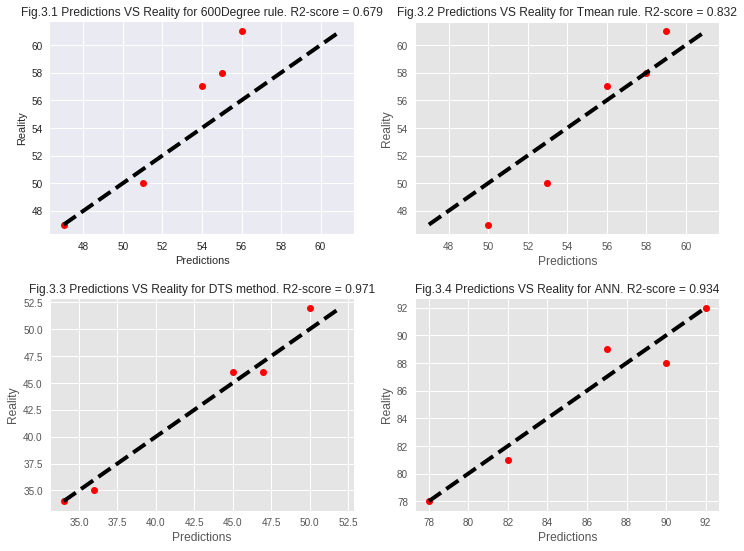

In [0]:
def plot_prediction(actual_labels, prediction,pos,result):
    plt.subplot(2,2,pos)
    plt.style.use('ggplot')
    plt.plot(prediction, actual_labels, 'ro')
    plt.plot([min(actual_labels), max(actual_labels)], [min(actual_labels), max(actual_labels)], 'k--', lw=4)
    plt.xlabel('Predictions')
    plt.ylabel('Reality')
    plt.title('Fig.3.'+str(pos)+' Predictions VS Reality for '+result, fontsize=12)
    
resultDts = r2_score(actual_bloom_days_dts,predicted_bloom_days_by_dts)
result600 = r2_score(actual_bloom_days_600degree,predicted_bloom_days_by_t600) 
resultTmean = r2_score(actual_bloom_days_600degree,predicted_bloom_days_by_tmean)
resultAnn = r2_score(actual_bloom_days_ann, predicted_bloom_days_by_ann)

plt.figure(figsize=(12, 9))
plt.subplots_adjust(wspace=None, hspace=0.3)
plot_prediction(actual_bloom_days_600degree,predicted_bloom_days_by_t600,1,
                str('600Degree rule. R2-score = {:.3f}'.format(result600)))
plot_prediction(actual_bloom_days_600degree,predicted_bloom_days_by_tmean,2,
                str('Tmean rule. R2-score = {:.3f}'.format(resultTmean)))
plot_prediction(actual_bloom_days_dts,predicted_bloom_days_by_dts,3,
                str('DTS method. R2-score = {:.3f}'.format(resultDts)))
plot_prediction(actual_bloom_days_ann,predicted_bloom_days_by_ann,4,
                str('ANN. R2-score = {:.3f}'.format(resultAnn)))
plt.show()

<h3><p><u>All plot discussions</u><br></h3>
  <ul><u>0.1</u>The performance of Tmean rule(Fig. 3.2) is better than 600 degree rule(Fig. 3.1). This is because the Tmean(=638) value has been modified forTokyo which is 38 degree higher than 600 degree centigrade. The Tmean-rule performs better but it was not that much accurate as two dots are placed far away from marginal line (Fig. 3.2)</ul>
  
  <ul><u>0.2</u>The DTS method (Fig.3.3) perfoms better than the 600 Degree and Tmean Rule which is obvious because the previous Rules take into account only one feature(Daily Max Temperature) whereas the DTS method goes for a more sophisticated approach taking into account Hibernation pattern, Temperature, Activation Energy, Standard Reaction Time etc. The method has recorded highest R2 score on test dataset.</ul>
  
<ul><u>0.3</u>Now the Neural Network also performs well (Fig.3.4). One of the major advantage of using ANN is their ability to solve a prediction problem by ust analysing the data-pattern. We do not need to define any mathematical rule or algorithm here. But it requires finding the most optimized network by parameter tuning. Another major drawback is that it cannot learn properly from smaller datasets and its performance is quite unpredictable on smaller test-data which is a major concern in our case. Our test data is too small and therefore any of the tunned model may accidently perform well on test data. we cannot simply expect that the network will perform equally well on large dataset too.</ul>

<h3><p><u>Decision</u><br></h3>The DTS method is considered best as its algorithm is well defined and therefore it may perform better on large datasets too. The ANN model also has the potential to perform well. But it needs to be trained and tested using more data for better accuracy</p>

</p>

***
## 4. Trends of the Sakura blooming phenomenon (20pts total)

### Problem 4-1: (20pts)
Based on the data from the past 60 years, investigate and discuss trends in the sakura hibernation ($D_{j}$) and blooming ($BD_{j}$) phenomena in Tokyo.

<h3><p><u>Plotting Dj and BDj with respect to all years</u></p>

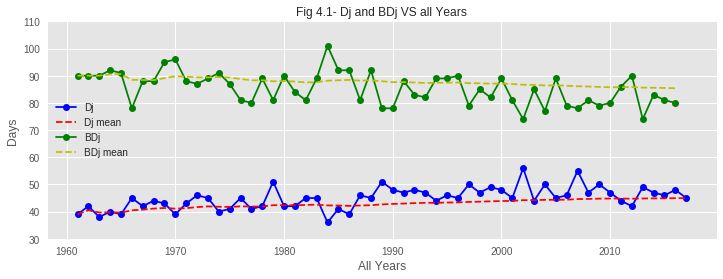

In [0]:
bloom_days = list(sakuradb['bloom day'])
avg_temp = list(sakuradb['avg temp'])
sea_pressure = list(sakuradb['sea pressure'])

addingDj = 0
all_avgDj = []
all_avgBDj = []
for count in range(len(dj_all_by_day)):
  addingDj = addingDj + dj_all_by_day[count]
  avgDj = addingDj/(count+1)
  all_avgDj.append(avgDj)
  
addingBDj = 0
all_avg = []
for count in range(len(bloom_days)):
  addingBDj = addingBDj+bloom_days[count]
  avgBDj = addingBDj/(count+1)
  all_avgBDj.append(avgBDj)  

plt.subplots(figsize=(12, 4))
plt.plot(allyears,dj_all_by_day,'-bo', label= 'Dj')
plt.plot(allyears,all_avgDj,'--r',label= 'Dj mean')
plt.plot(allyears[0:-1],bloom_days,'-go',label= 'BDj')
plt.plot(allyears[0:-1],all_avgBDj,'--y',label= 'BDj mean')
plt.xlabel('All Years')
plt.ylabel('Days')
plt.ylim(30, 110)
plt.title('Fig 4.1- Dj and BDj VS all Years', Fontsize = 12)
plt.legend()
plt.show()

<h3><p><u>Plotting the Duration of Growth-phase for all years </u></p>

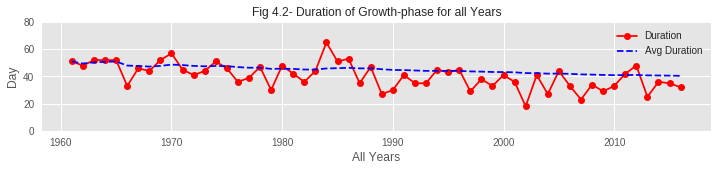

In [0]:
difference=[x1 - x2 for (x1, x2) in zip(bloom_days,dj_all_by_day[0:-1])]
adding = 0
all_avg = []
for count in range(len(difference)):
  adding = adding+difference[count]
  avg = adding/(count+1)
  all_avg.append(avg)

plt.subplots(figsize=(12, 2))
plt.plot(allyears[0:-1],difference,'-ro', label= 'Duration')
plt.plot(allyears[0:-1],all_avg,'--b',label= 'Avg Duration')
plt.xlabel('All Years')
plt.ylabel('Day')
plt.ylim(0, 80)
plt.title('Fig 4.2- Duration of Growth-phase for all Years', Fontsize = 12)
plt.legend()
plt.show()

<h3><p><u>Plotting average temperature of all years</u></p>

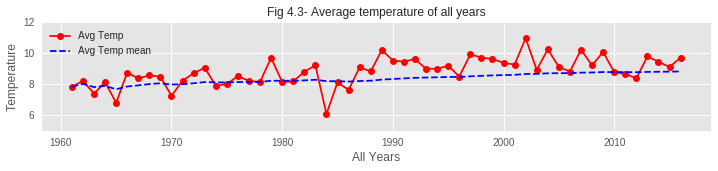

In [0]:
adding = 0
all_avg = []
for count in range(len(avg_temp)):
  adding = adding+avg_temp[count]
  avg = adding/(count+1)
  all_avg.append(avg)
  
plt.subplots(figsize=(12, 2))
plt.plot(allyears[0:-1],avg_temp,'-ro',label= 'Avg Temp')
plt.plot(allyears[0:-1],all_avg,'--b',label= 'Avg Temp mean')
plt.xlabel('All Years')
plt.ylabel('Temperature')
plt.ylim(5, 12)
plt.title('Fig 4.3- Average temperature of all years', Fontsize = 12) 
plt.legend()
plt.show()

<p>NB- The Average Temperatures  in this plot are calculated for the first four months of each year. The reason is that these months have the most significant impact on bloom-dates.<p>

<h3><p><u>Plotting sea-pressure of all years</u></p>

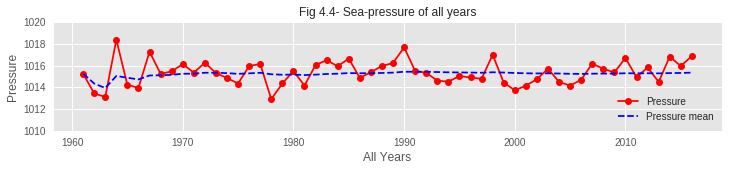

In [0]:
adding = 0
all_avg = []
for count in range(len(sea_pressure)):
  adding = adding+sea_pressure[count]
  avg = adding/(count+1)
  all_avg.append(avg)

plt.subplots(figsize=(12, 2))
plt.plot(allyears[0:-1],sea_pressure,'-ro',label='Pressure')
plt.plot(allyears[0:-1],all_avg,'--b',label='Pressure mean')
plt.xlabel('All Years')
plt.ylabel('Pressure')
plt.ylim(1010, 1020)
plt.title('Fig 4.4- Sea-pressure of all years', Fontsize = 12)
plt.legend()
plt.show()

<h3><p><u>All Plot Discussions</u> <br></h3>
<ul><u>01.</u> From the Graphs of 4.1 it is clear that the Hibernation Pattern has changed over the past 60 years. In recent years, the end of Hibernation taking place with a noticeable delay compared to the past years. The reason behind this might be the increase of average-temperature over the years (Fig. 4.3). Due of such increase in temperature of the first few months of recent years, The temperature: TF (Problem 2-1)  is rising and therefore increasing Dj value. So hibernation phase is delaying to end.</ul>
<ul><u>02.</u> From Fig 4.1 it is also observed that BDJmean curve is gradually falling down over the years. That means the bloom is coming earlier in recent years. This phenomena is verified by the Graph of problem 1-1 as it tells that the Accumulated Max Temperature of hybernation phase has decreased over the years.</ul>
<ul><u>03.</u> As hibernation is delaying to end but bloom is coming earlier, the duration of growth-period of sakura-buds is shrinking over the years (Fig. 4.2). From my assumption global warming might be a reason behind this. Due to global-warming average temperature is gradually rising (Fig 4.3) and spring is coming a bit earlier in every year and making Sakura-buds to bloom earlier than the previous years.</ul>
<ul><u>04.</u>Though the average sea-pressure is found almost constant over the years, It is seen rising in very recent years (Fig. 4.4).Sea-pressure of recent years has merely dropped below the average-line. This may have impact on early-blooming </ul></p>